Your Name and PRN:
- Name : Kunal Ukey
- PRN  : 240340128011
- Date : 16-05-2024

# Image Processing with Neural Network
## Assignment 02


## Take Perceptron implementation notebook and add sigmoid activation function

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report, log_loss

In [32]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [33]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [34]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [35]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [36]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [37]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

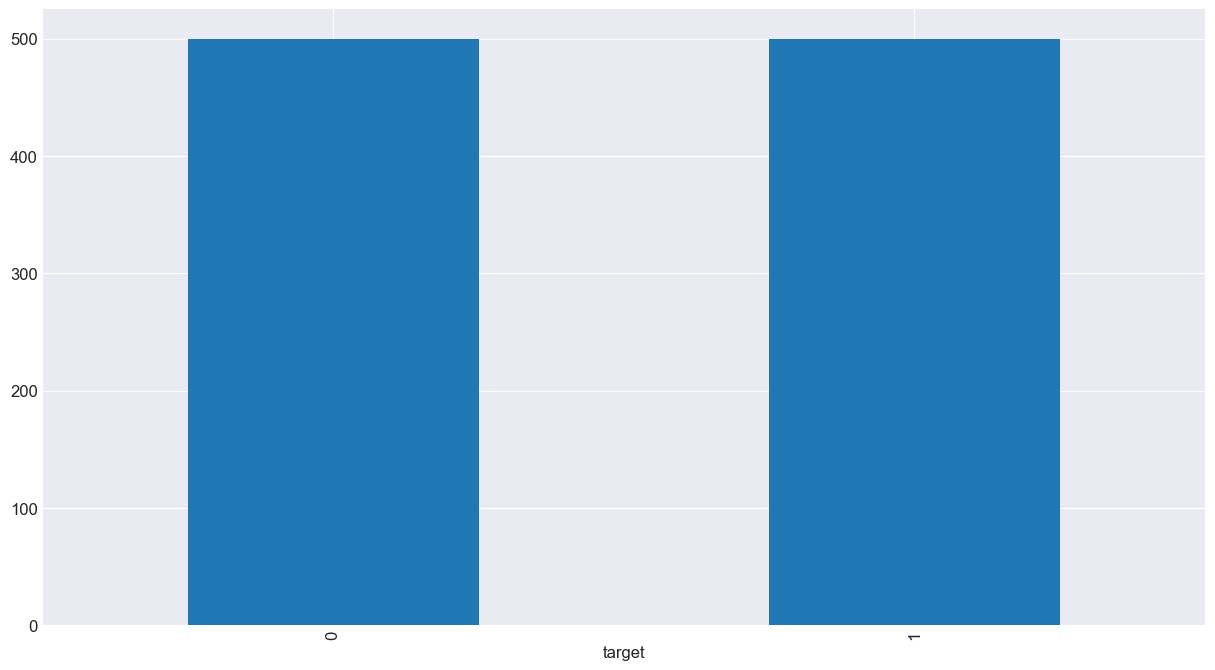

In [38]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

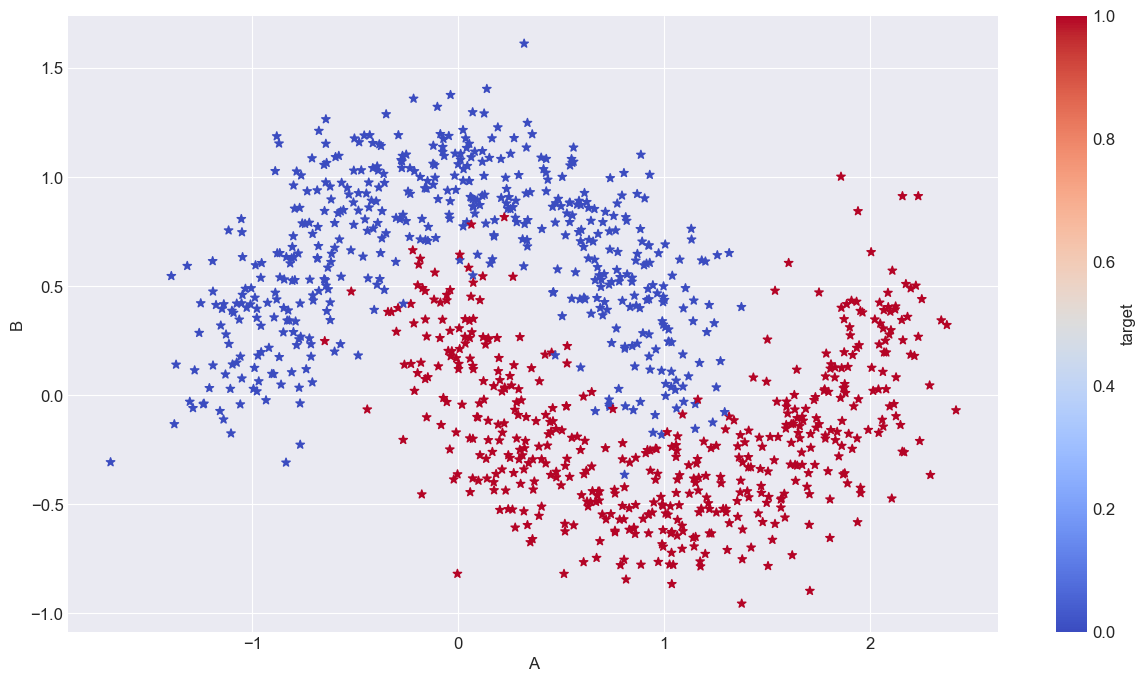

In [39]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

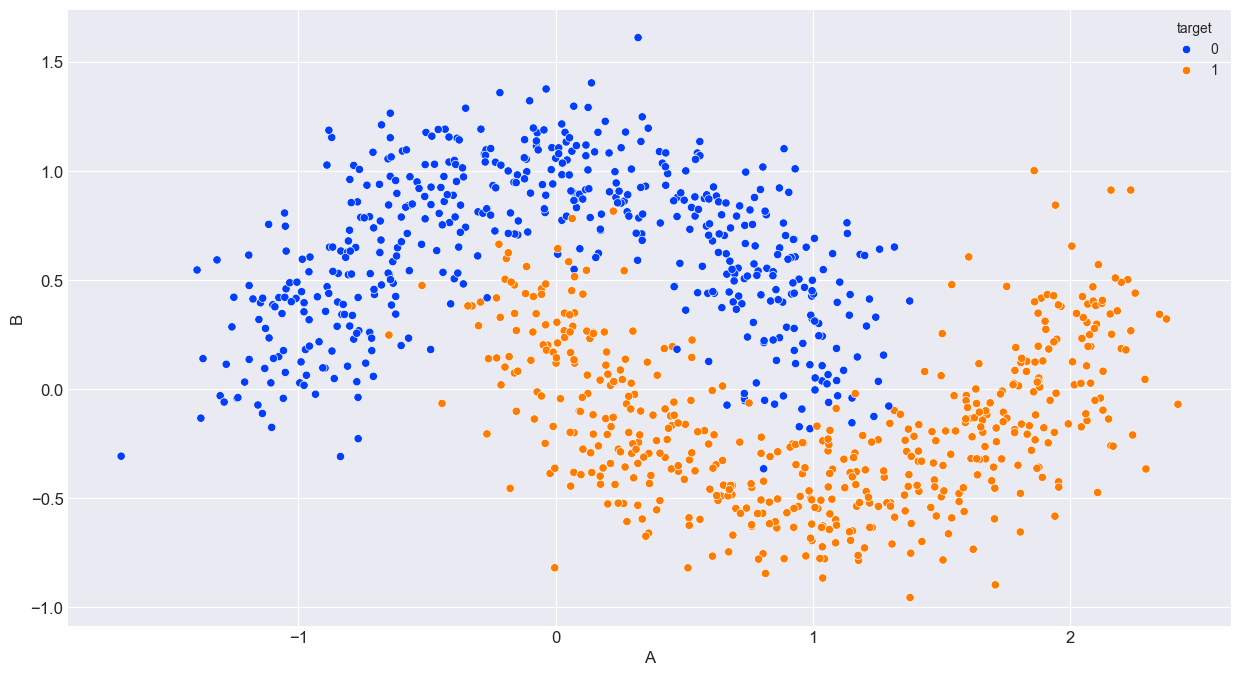

In [40]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

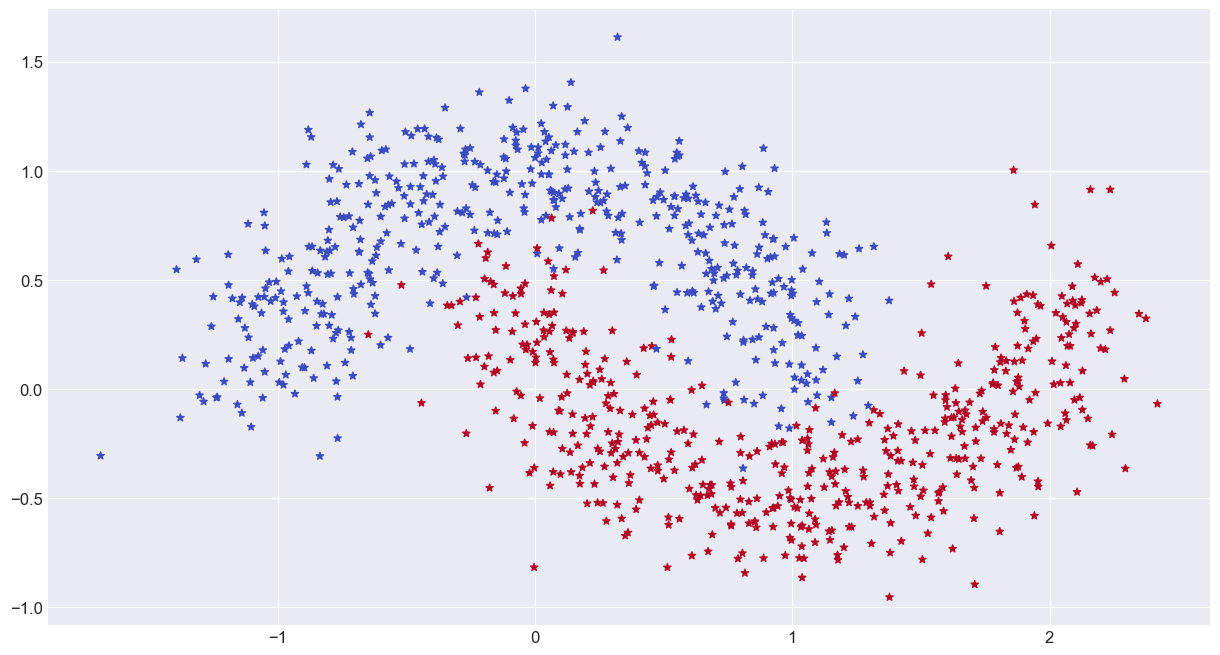

In [41]:
#### In case you want to plot X Array directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [42]:
data_train,data_test = data_df.to_numpy()[:900],data_df.to_numpy()[900:]

In [43]:
data_train.shape,data_test.shape

((900, 3), (100, 3))

In [44]:
type(data_train)

numpy.ndarray

In [45]:
data_train.shape[1]

3

In [46]:
weights = rng.random(data_train.shape[1])
# w0,w1,w2
# Z = x*w+b
# Z= weights[0]
weights

array([0.33026884, 0.40517732, 0.57473782])

In [47]:
def sig(z):
    return 1/(1+np.exp(-z))

In [48]:
def predict(row,weights):
    z = weights[0]
    for i in range(len(row)-1):
        z+=weights[i+1]*row[i]  # z = W*X+b
    return sig(z)

In [49]:
wgts  = np.array([0.1,2.0,1.0])
predict(data_train[0],wgts)

0.9434999754763397

In [50]:
def train_weights(train,n_epochs,alpha):
    errors = []
    weights = rng.random(train.shape[1]) # Weights at random
    m=train.shape[0] # number of rows in the training data

    for epoch in range(n_epochs):
        sum_error = 0.0
        for row in train:
            prediction = predict(row,weights)
            dz = prediction - row[-1]
            sum_error+=(dz)**2

            weights[0] = weights[0] - alpha * dz / m

            for i in range(len(row)-1):
                weights[i+1]=weights[i+1]-alpha * dz * row[i] / m
        errors.append(sum_error/m)
    return errors,weights

In [51]:
errors, weights = train_weights(data_train,EPOCHS,ALPHA)

In [52]:
weights

array([ 0.54500398,  1.18693234, -4.7403113 ])

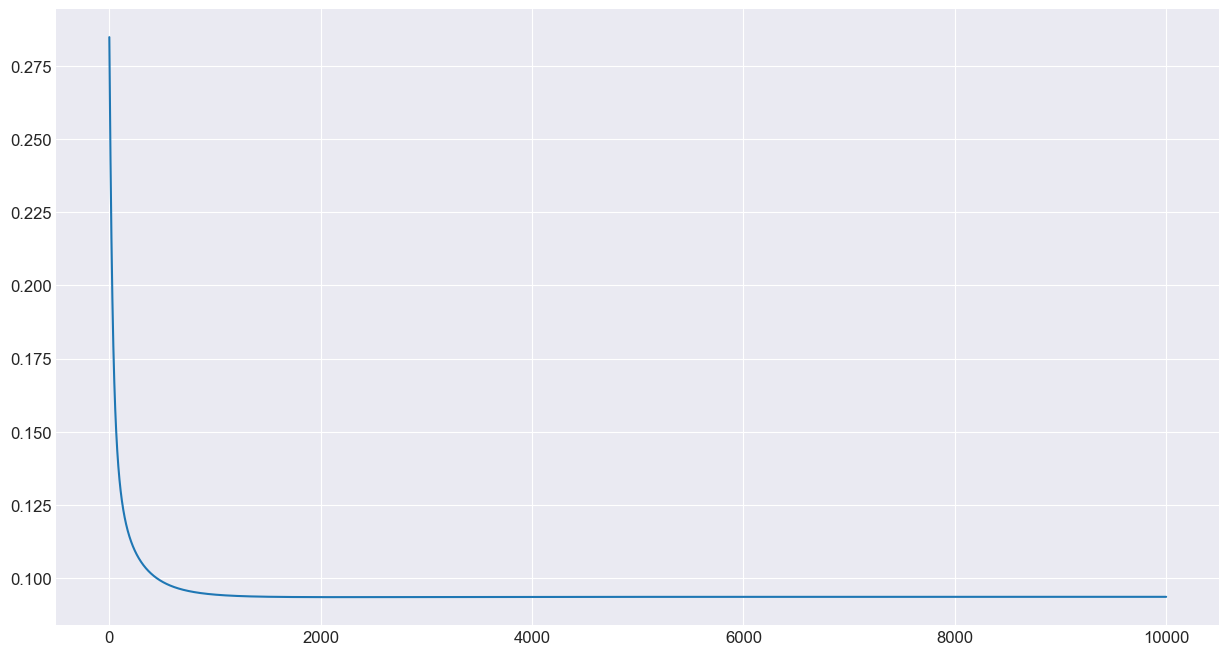

In [53]:
plt.plot(errors)

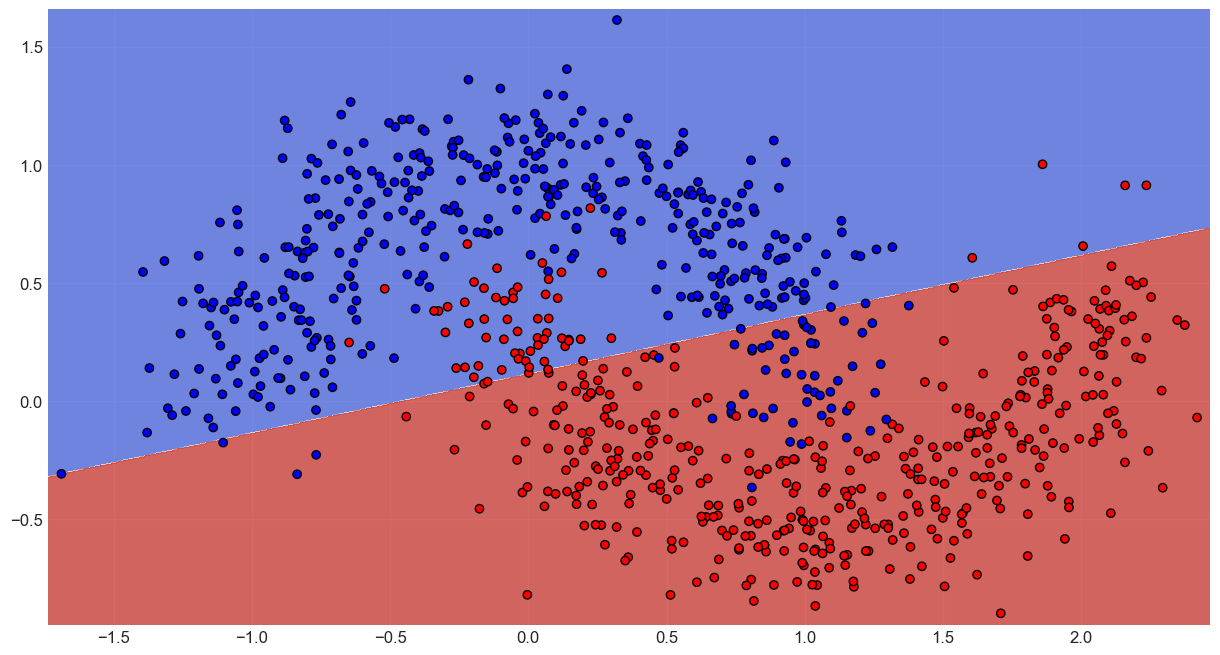

In [54]:
X = data_train
fig,ax = plt.subplots()

dm = 0.005
x_min,x_max = X[:,0].min()-0.05,X[:,0].max()+0.05
y_min,y_max = X[:,1].min()-0.05,X[:,1].max()+0.05

xx,yy = np.meshgrid(np.arange(x_min,x_max,dm),
                    np.arange(y_min,y_max,dm))

XX = np.c_[xx.ravel(),yy.ravel()]
XX = np.hstack((XX,np.ones((XX.shape[0],1))))

y_pred = []

for row in XX:
    pred = predict(row,weights)
    y_p = 1 if pred >=0.5 else 0
    y_pred.append(y_p)
Z = np.array(y_pred).reshape(xx.shape)
ax.contourf(xx,yy,Z,cmap = CMAP,alpha=0.8)
ax.scatter(X[:,0],X[:,1],c=X[:,2],edgecolors='k',cmap=plt.cm.bwr)

In [55]:
np.meshgrid?


Signature:       np.meshgrid(*xi, copy=True, sparse=False, indexing='xy')
Call signature:  np.meshgrid(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function meshgrid at 0x000001B43F4E1B20>
File:            c:\users\administrator.dai-pc2\anaconda3\lib\site-packages\numpy\lib\function_base.py
Docstring:      
Return a list of coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of
N-D scalar/vector fields over N-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.

.. versionchanged:: 1.9
   1-D and 0-D cases are allowed.

Parameters
----------
x1, x2,..., xn : array_like
    1-D arrays representing the coordinates of a grid.
indexing : {'xy', 'ij'}, optional
    Cartesian ('xy', default) or matrix ('ij') indexing of output.
    See Notes for more details.

    .. versionadded:: 1.7.0
sparse : bool, optional
    If True the shape of the returned coordinate array for dimension *i*
    is reduced fro

In [56]:
xx.shape

(522, 842)

In [57]:
yy.shape

(522, 842)

# Test Data

In [58]:
predictions = []
for row in data_test:
    pred = predict(row, weights)
    y_pred = 1 if pred>=0.5 else 0 
    predictions.append(y_pred)
accuracy_score(data_test[:, -1], predictions)

0.9

In [59]:
cm = confusion_matrix(data_test[:,-1],predictions)
cm

array([[55,  3],
       [ 7, 35]], dtype=int64)

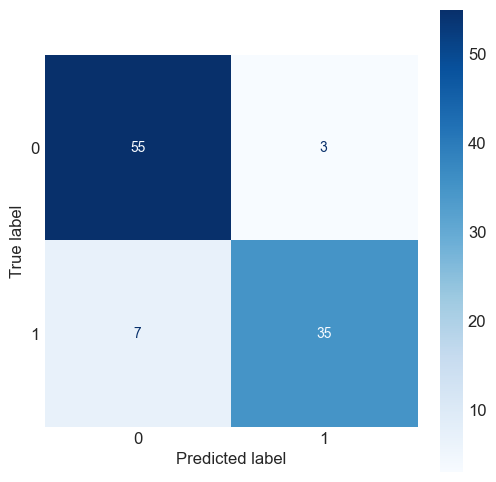

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
fig,ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax,cmap=plt.cm.Blues)
ax.grid(False)